In [1]:
from tqdm.auto import trange
import numpy as np
import random
import torch

from world.map_loaders.base import MixedMapLoader
from world.envs import VersusBotEnv
from world.realm import Realm
from world.map_loaders.two_teams import TwoTeamRocksMapLoader, TwoTeamLabyrinthMapLoader
from world.scripted_agents import ClosestTargetAgent, Dummy

from constants import SEED, NUM_AGENTS, NUM_TEAMS, TRANSITIONS, DEVICE
from utils import initialize_buffer, one_epoch_train, logging, Logger, PositionTracker
from agent import DQN

%matplotlib inline

In [2]:
np.random.seed(SEED)
random.seed(SEED)
torch.manual_seed(SEED)

print(DEVICE)

cuda


In [3]:
# agent_file = "./agent_28.8.pkl"

agent = DQN()

# agent.policy_net.load_state_dict(torch.load(agent_file))
# agent.target_net.load_state_dict(torch.load(agent_file))

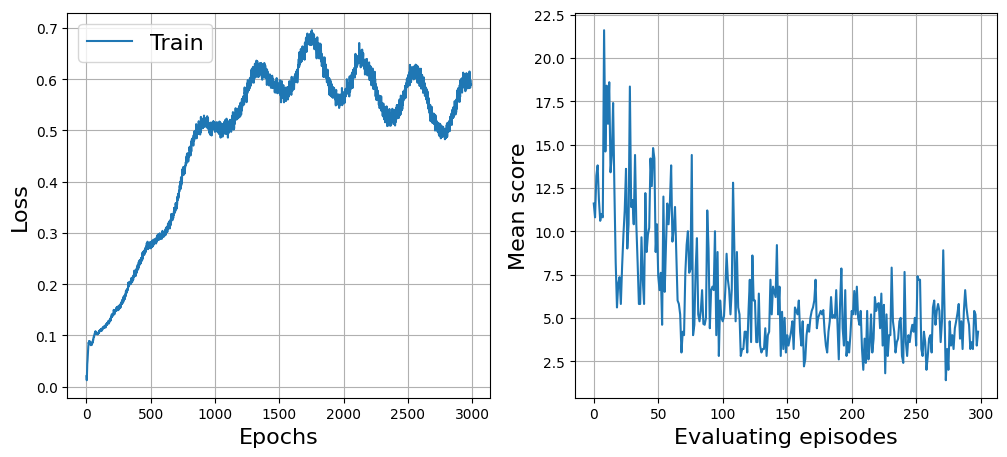


Epoch: 2990
Reward mean: [-99.6]
Reward std: [54.91]
Scores mean: 4.2
Mean difference me-bot: -57.0



KeyboardInterrupt: 

In [4]:
env = VersusBotEnv(
    Realm(
        MixedMapLoader(
            (
                TwoTeamRocksMapLoader(rock_spawn_proba=0.01, additional_rock_spawn_proba=0.01),
                TwoTeamRocksMapLoader(rock_spawn_proba=0.1, additional_rock_spawn_proba=0.1),
                TwoTeamRocksMapLoader(rock_spawn_proba=0.15, additional_rock_spawn_proba=0.21),
                TwoTeamRocksMapLoader(rock_spawn_proba=0.15, additional_rock_spawn_proba=0.1),
                TwoTeamRocksMapLoader(rock_spawn_proba=0.01, additional_rock_spawn_proba=0.21),
                TwoTeamRocksMapLoader(rock_spawn_proba=0.1, additional_rock_spawn_proba=0.01),
                TwoTeamRocksMapLoader(rock_spawn_proba=0.15, additional_rock_spawn_proba=0.15),
                TwoTeamRocksMapLoader(rock_spawn_proba=0.10, additional_rock_spawn_proba=0.21),
                TwoTeamLabyrinthMapLoader(additional_links_min=1, additional_links_max=2),
                TwoTeamLabyrinthMapLoader(additional_links_min=2, additional_links_max=3),
                TwoTeamLabyrinthMapLoader(additional_links_min=4, additional_links_max=5),
                TwoTeamLabyrinthMapLoader(additional_links_min=5, additional_links_max=6),
                TwoTeamLabyrinthMapLoader(additional_links_min=7, additional_links_max=9),
                TwoTeamLabyrinthMapLoader(additional_links_min=10, additional_links_max=11),
                TwoTeamLabyrinthMapLoader(additional_links_min=11, additional_links_max=12),
                TwoTeamLabyrinthMapLoader(additional_links_min=12, additional_links_max=12)         
            )
        ),
        NUM_TEAMS,
        bots={1: ClosestTargetAgent()},
        playable_team_size=NUM_AGENTS
    )
)

logger = Logger()
tracker = PositionTracker()

target_agent = ClosestTargetAgent(NUM_AGENTS)

initialize_buffer(env, agent, target_agent, tracker)

for i_episode in trange(TRANSITIONS):
    one_epoch_train(env, agent, tracker)

    if (i_episode + 1) % (TRANSITIONS // 5000) == 0:
        logging(env, agent, logger, tracker, i_episode)

In [ ]:
a = TRANSITIONS

for i_episode in trange(a):

    if (i_episode + 1) % (a // 5000) == 0:
        print(i_episode + 1)